In [1]:
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

STEP 1: Edge Detection


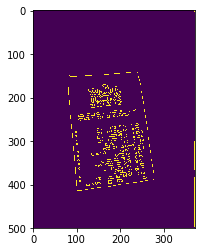

In [2]:
image = cv2.imread("1.png")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
# cv2.imshow("Image", image)
# cv2.imshow("Edged", edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(image)
plt.imshow(edged)

STEP 2: Find contours of paper


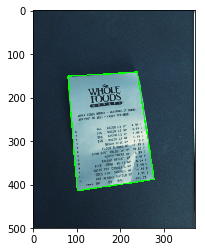

In [3]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break
 
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)

In [4]:
# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
 
# show the original and scanned images
print("STEP 3: Apply perspective transform")
# cv2.imshow("Scanned", imutils.resize(warped, height = 650))
# cv2.waitKey(0)

STEP 3: Apply perspective transform


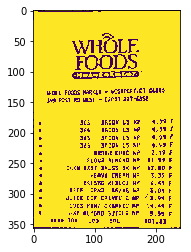

In [5]:
plt.imshow(warped)